# Flights Data Exploration Challenge

In [1]:
import pandas as pd
import numpy as np
df_flights2 = df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [2]:
# Identify any null or missing data
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [3]:
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [4]:
df_flights[df_flights.isnull().any(axis=1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [5]:
# impute appropriate replacement values
df_flights = df_flights.fillna(0)
# df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
# df_flights.isnull().sum()

In [6]:
df_test = df_flights['DepDelay']
print(df_test.name)

DepDelay


In [7]:
# Identify and eliminate any outliers in the DepDelay and ArrDelay columns

%matplotlib inline
from matplotlib import pyplot as plt

def show_boxplot(var):
    
    fig = plt.figure(figsize=(50,10))
    plt.boxplot(var, vert=False)
    lv_name = var.name
    plt.title(lv_name)
    
    fig.show()

def eli_outliers(df, var):
    mean = var.mean()
    std = var.std()
    low = mean - 1*std
    high = mean + 1*std
    new_df = df[(var>low) & (var<high)]
    return new_df

lv_value = df_flights.iloc[0]['DepDel15']
print(type(lv_value))

# if isinstance(lv_value,(int,float)):
if isinstance(lv_value,(np.integer,float)):
    print('True')

<class 'numpy.float64'>
True


Year                 271940
Month                271940
DayofMonth           271940
DayOfWeek            271940
Carrier              271940
OriginAirportID      271940
OriginAirportName    271940
OriginCity           271940
OriginState          271940
DestAirportID        271940
DestAirportName      271940
DestCity             271940
DestState            271940
CRSDepTime           271940
DepDelay             271940
DepDel15             271940
CRSArrTime           271940
ArrDelay             271940
ArrDel15             271940
Cancelled            271940
dtype: int64


<ipython-input-7-860bbe4550c8>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-860bbe4550c8>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-860bbe4550c8>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = df[(var>low) & (var<high)]
<ipython-input-7-860bbe4550c8>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-860bbe4550c8>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


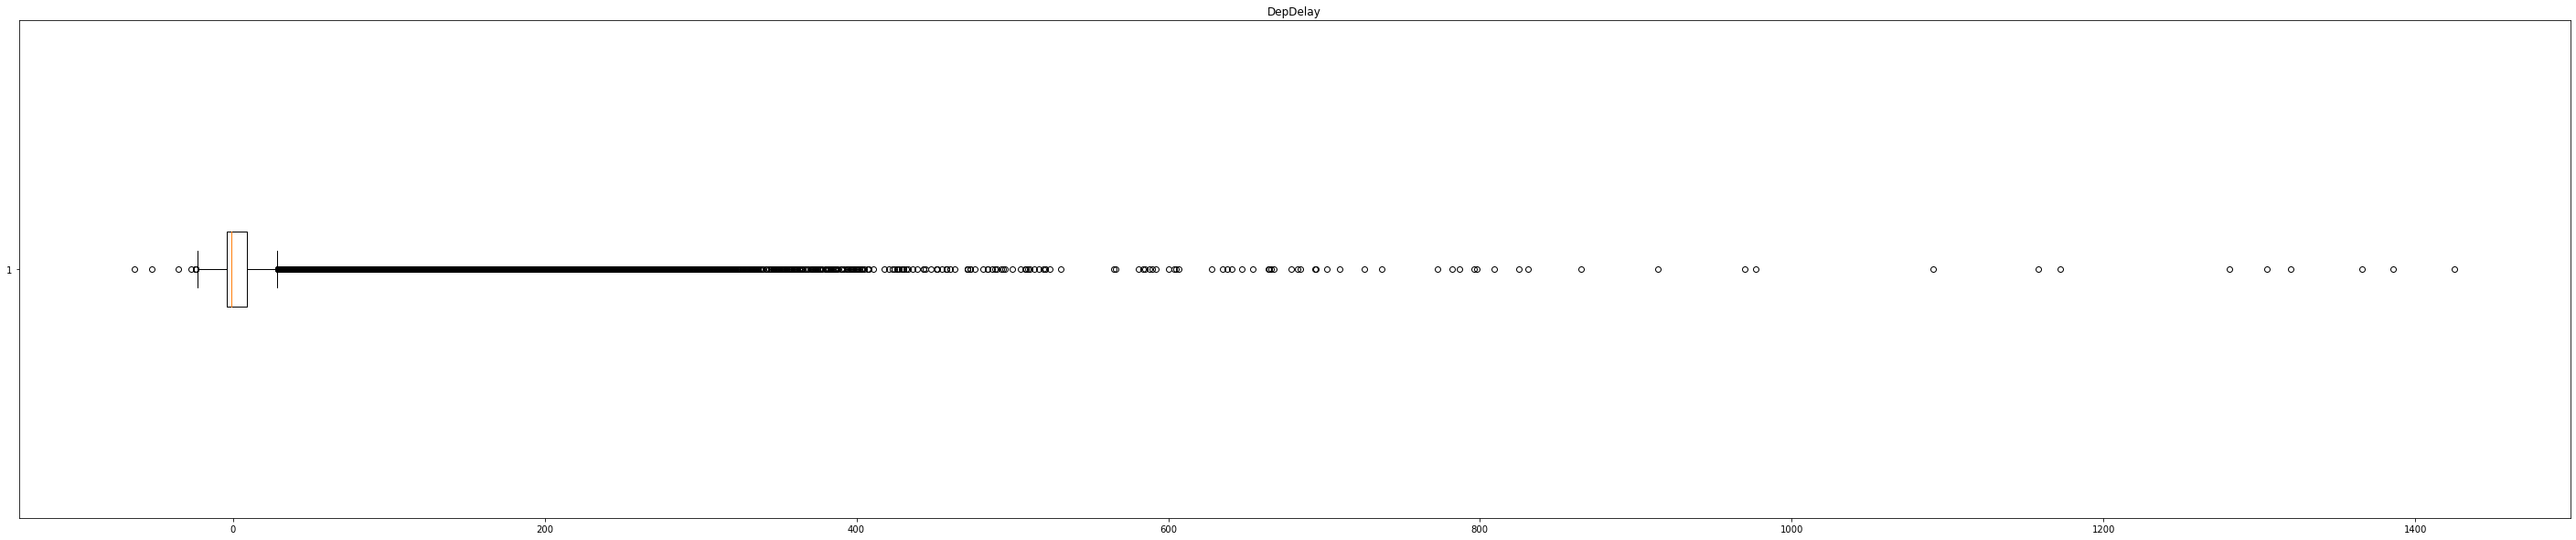

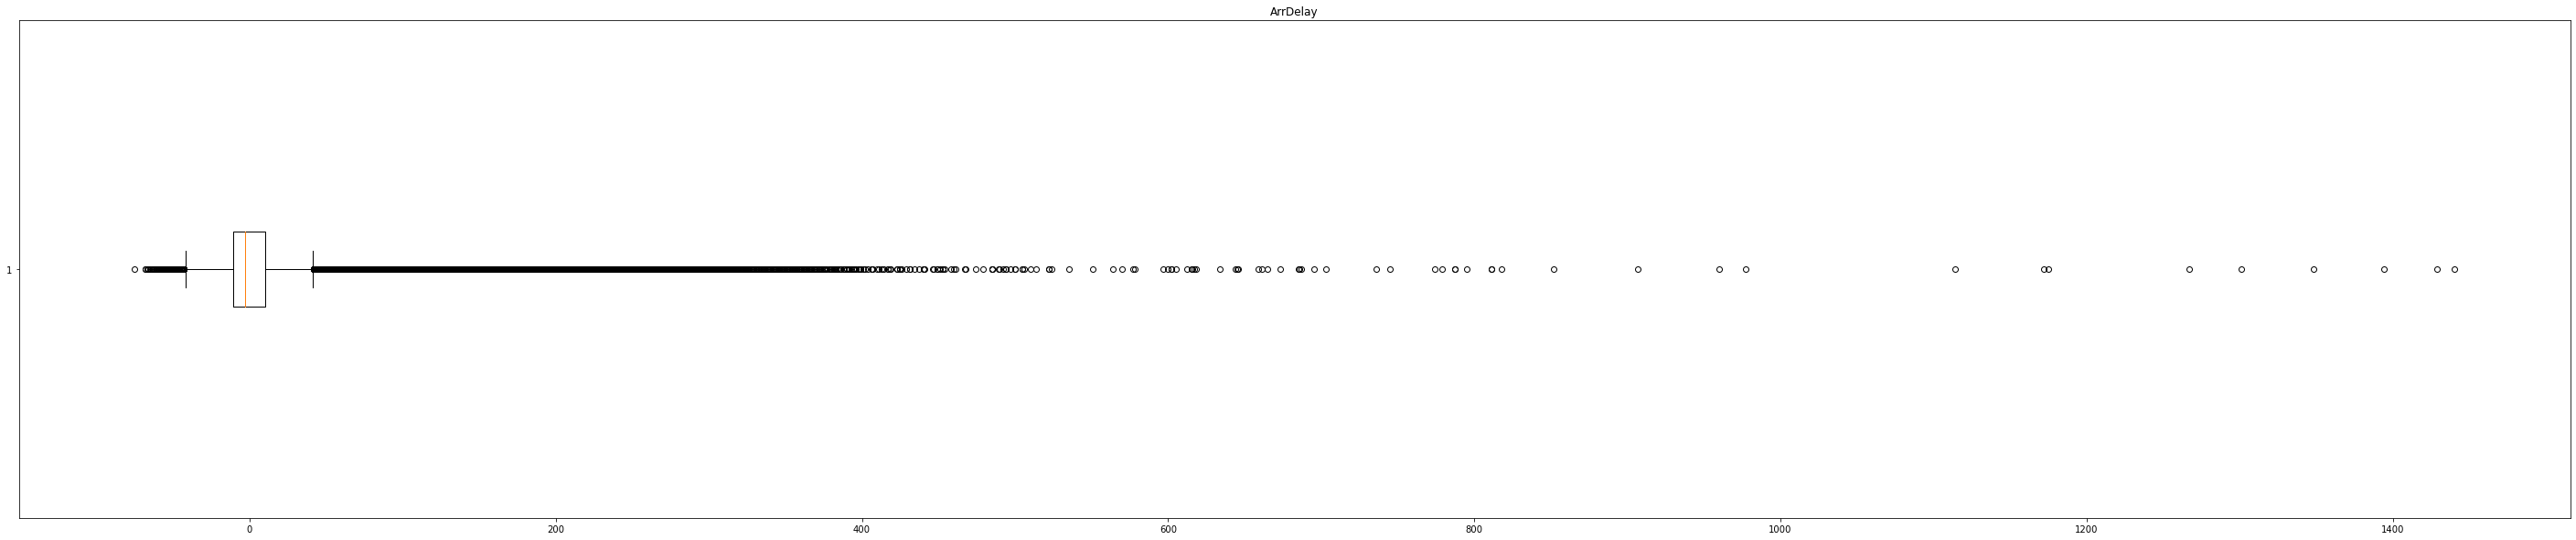

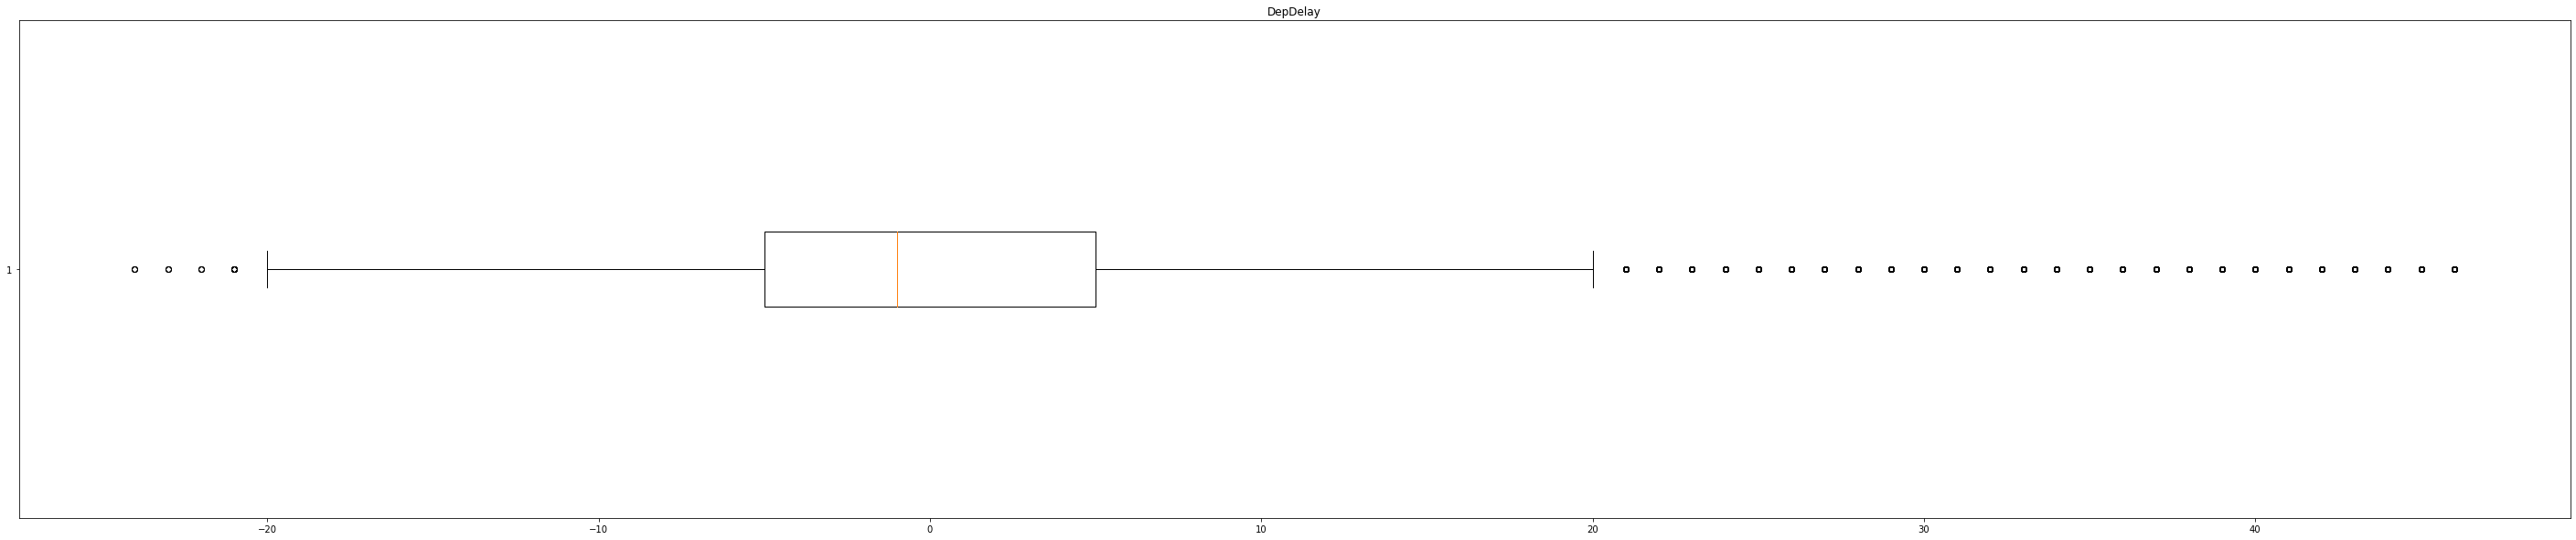

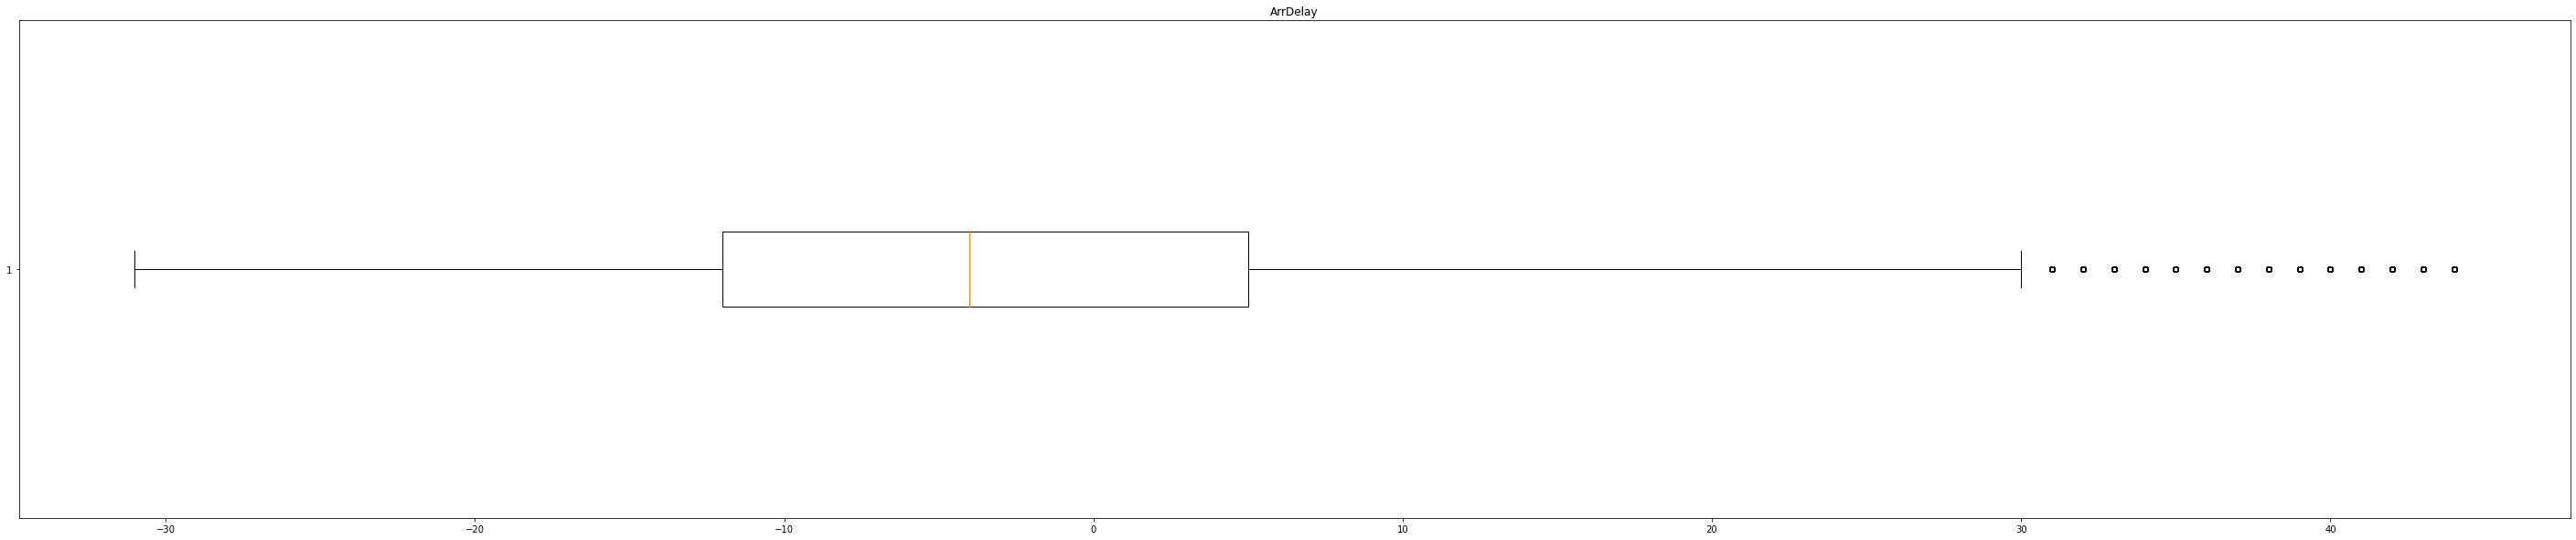

In [8]:
print(df_flights.count())
col = df_flights['DepDelay']
show_boxplot(col)
col2 = df_flights['ArrDelay']
show_boxplot(col2)

df_flights = eli_outliers(df_flights, col)
df_flights = eli_outliers(df_flights, col2)

col = df_flights['DepDelay']
show_boxplot(col)
col2 = df_flights['ArrDelay']
show_boxplot(col2)

In [9]:
df_flights.count()

Year                 243025
Month                243025
DayofMonth           243025
DayOfWeek            243025
Carrier              243025
OriginAirportID      243025
OriginAirportName    243025
OriginCity           243025
OriginState          243025
DestAirportID        243025
DestAirportName      243025
DestCity             243025
DestState            243025
CRSDepTime           243025
DepDelay             243025
DepDel15             243025
CRSArrTime           243025
ArrDelay             243025
ArrDel15             243025
Cancelled            243025
dtype: int64

['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier', 'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState', 'DestAirportID', 'DestAirportName', 'DestCity', 'DestState', 'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'Cancelled']


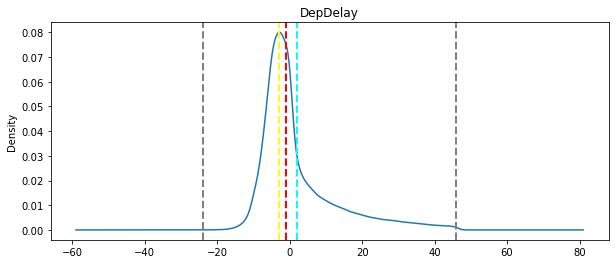

min:-24.00, mean:1.97, med:-1.00, mode:-3.00, max:46.00


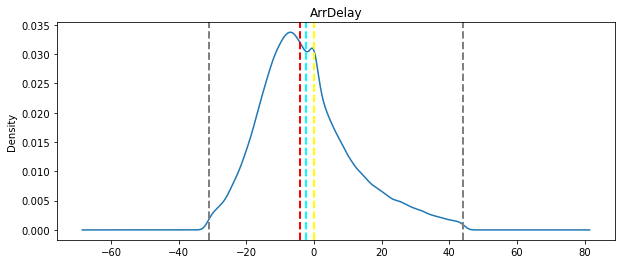

min:-31.00, mean:-2.24, med:-4.00, mode:0.00, max:44.00


In [10]:
# View summary statistics for the numeric fields in the dataset
lv_list = df_flights.columns.tolist()
print(lv_list)

def show_dis(var):
    fig = plt.figure(figsize=(10,4))
    
    var.plot.density()
    plt.title(var.name)
    plt.axvline(x=var.min(), color='gray', linestyle='dashed', linewidth=2)
    plt.axvline(x=var.mean(), color='cyan', linestyle='dashed', linewidth=2)
    plt.axvline(x=var.median(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(x=var.mode()[0], color='yellow', linestyle='dashed', linewidth=2)
    plt.axvline(x=var.max(), color='gray', linestyle='dashed', linewidth=2)
    
    plt.show()
    
    print("min:{:.2f}, mean:{:.2f}, med:{:.2f}, mode:{:.2f}, max:{:.2f}"
          .format(var.min(), var.mean(), var.median(), var.mode()[0], var.max()))
show_dis(df_flights['DepDelay'])
show_dis(df_flights['ArrDelay'])

### Sample:Clean outliers

DepDelay 
Min:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Max::1425.00

ArrDelay 
Min:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Max::1440.00



<ipython-input-11-1f9edc68d5f2>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-11-1f9edc68d5f2>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


DepDelay 
Min:-27.00
Mean:1.19
Median:-2.00
Mode:-3.00
Max::37.00

ArrDelay 
Min:-32.00
Mean:-3.17
Median:-5.00
Mode:0.00
Max::37.00



<ipython-input-11-1f9edc68d5f2>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-11-1f9edc68d5f2>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


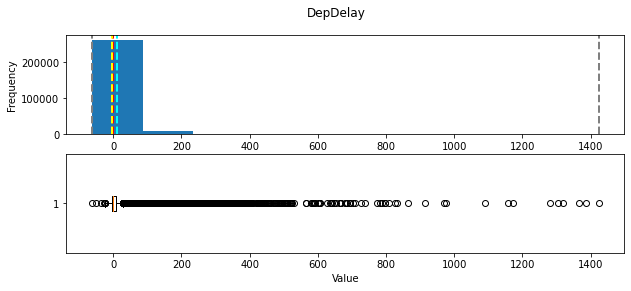

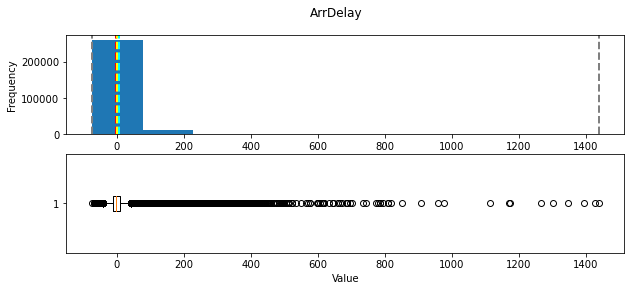

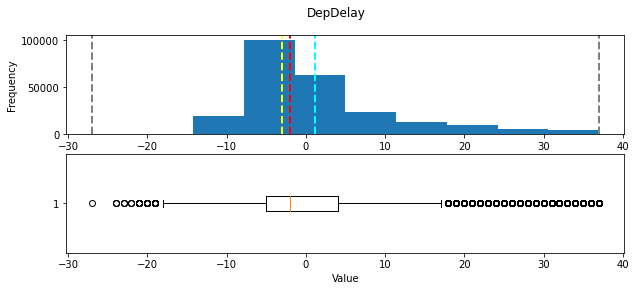

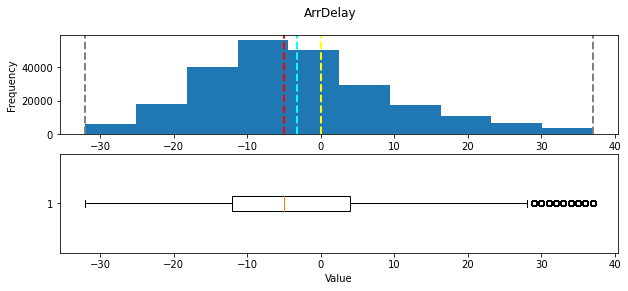

In [11]:
# Function to show summary stats and distribution for a column
def show_two(var):
    from matplotlib import pyplot as plt
    
    min_v = var.min()
    mean_v = var.mean()
    med_v = var.median()
    mode_v = var.mode()[0]
    max_v = var.max()
    
    print(var.name,'\nMin:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMax::{:.2f}\n'.format(min_v, mean_v, med_v, mode_v, max_v))
    
    fig, ax = plt.subplots(2, 1, figsize = (10,4))
    
    ax[0].hist(var)
    ax[0].set_ylabel('Frequency')
    
    ax[0].axvline(x=min_v, color='gray', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mean_v, color='cyan', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=med_v, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mode_v, color='yellow', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=max_v, color='gray', linestyle='dashed', linewidth=2)
    
    ax[1].boxplot(var, vert=False)
    ax[1].set_xlabel('Value')
    
    fig.suptitle(var.name)
    
    fig.show()
    
delayFields = ['DepDelay', 'ArrDelay']
for col in delayFields:
    show_two(df_flights2[col])
    

# Trim outliers based on 1% and 90% percentiles
Arr_qt01 = df_flights2.ArrDelay.quantile(0.01)
Arr_qt90 = df_flights2.ArrDelay.quantile(0.90)
df_flights2 = df_flights2[df_flights2.ArrDelay < Arr_qt90]
df_flights2 = df_flights2[df_flights2.ArrDelay > Arr_qt01]

Dep_qt01 = df_flights2.DepDelay.quantile(0.01)
Dep_qt90 = df_flights2.DepDelay.quantile(0.90)
df_flights2 = df_flights2[df_flights2.DepDelay < Arr_qt90]
df_flights2 = df_flights2[df_flights2.DepDelay > Arr_qt01]

for col in delayFields:
    show_two(df_flights2[col])

In [12]:
df_flights2[delayFields].mean()

DepDelay    1.191684
ArrDelay   -3.174883
dtype: float64

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='Carrier'>

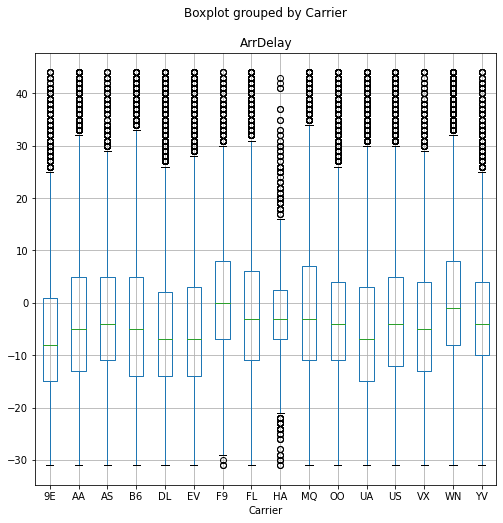

In [22]:
# How do the carriers compare in terms of arrival delay performance?
df_flights.boxplot(column='ArrDelay', by='Carrier', figsize=(8,8))

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DayOfWeek'>

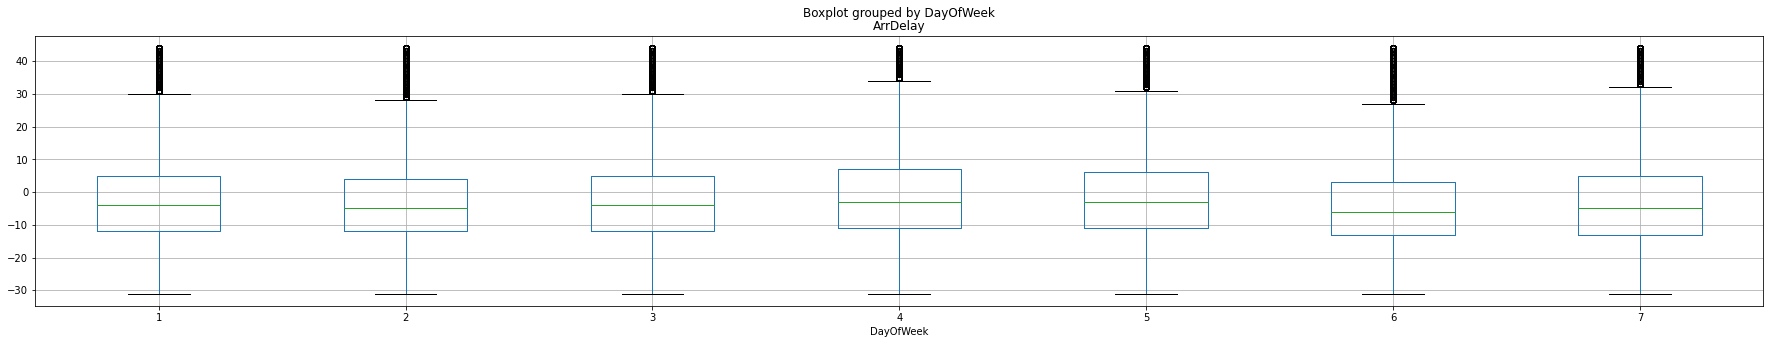

In [14]:
# Is there a noticable difference in arrival delays for different days of the week?
df_flights.boxplot(column='ArrDelay', by='DayOfWeek', figsize=(30,5))

In [15]:
# Which departure airport has the highest average departure delay?
print(df_flights.groupby(df_flights.OriginAirportName)['DepDelay'].mean().nlargest(3))

OriginAirportName
Chicago Midway International    7.452430
William P Hobby                 5.998873
Dallas Love Field               5.785596
Name: DepDelay, dtype: float64


In [16]:
df_flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

In [17]:
# Do late departures tend to result in longer arrival delays than on-time departures?

print(df_flights[df_flights['DepDel15'] > 0]['ArrDelay'].mean())
print(df_flights[df_flights['DepDel15'] <= 0]['ArrDelay'].mean())

19.014176993534484
-5.203329130122956


<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

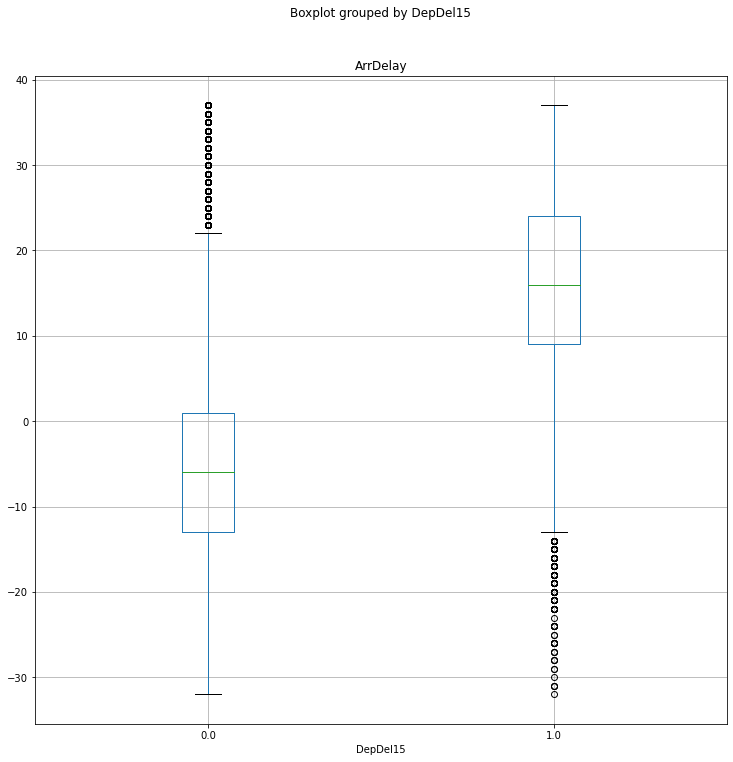

In [24]:
df_flights2.boxplot(column = 'ArrDelay', by = 'DepDel15', figsize=(12,12))

In [18]:
df_temp = df_flights[df_flights['DepDel15'] > 0]
df_temp2 = df_flights[df_flights['DepDel15'] <= 0]
print(df_flights.DepDel15.corr(df_flights.ArrDelay))
print(df_temp.DepDel15.corr(df_temp.ArrDelay))
print(df_temp2.DepDel15.corr(df_temp2.ArrDelay))

0.5640168835386312
nan
nan


In [19]:
# Which route (from origin airport to destination airport) has the most late arrivals?
df_flights['Route'] = df_flights[['OriginAirportName','DestAirportName']].agg('-'.join, axis=1)

In [ ]:
# Add a routes column
route = pd.Series(df_flights2['OriginAirportName']+'>'+df_flights2['DestAirportName'])
df_flights2 = pd.concat([df_flights2,route.rename("Route")], axis=1)

In [20]:
print(df_flights.iloc[df_flights['ArrDelay'].argmax()]['Route'], df_flights.iloc[df_flights['ArrDelay'].argmax()]['ArrDelay'])

Denver International-Logan International 44


In [21]:
# Which route has the highest average arrival delay?
print(df_flights.groupby(df_flights.Route)['ArrDelay'].mean().nlargest(3))

Route
Southwest Florida International-Theodore Francis Green State                   44.000000
Louis Armstrong New Orleans International-Ronald Reagan Washington National    25.333333
Cleveland-Hopkins International-Palm Beach International                       18.000000
Name: ArrDelay, dtype: float64
